In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("customer churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [22]:
#inspection of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replaceing blanks with 0 as tenure is 0 and no total charges are recorded

In [23]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()
#df.isnull()
#df.isnull().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

0

In [9]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)	
	

#converted 0 and 1 values of senior citizen to yes /no to make it easier to underestand

In [10]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


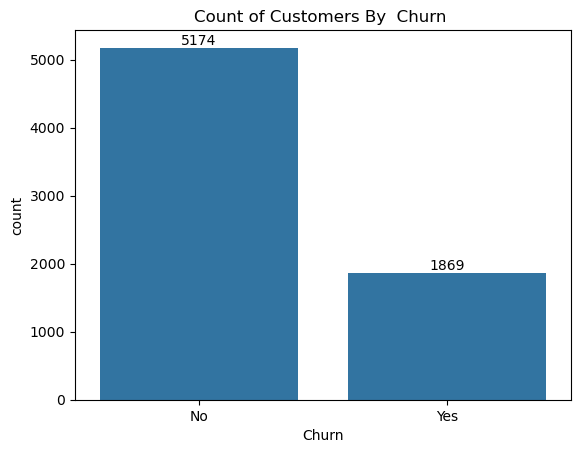

In [11]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers By  Churn ")
plt.show()

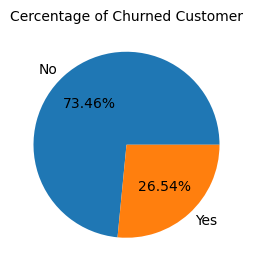

In [12]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})          #count of yes no and pecentage
gb

plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Cercentage of Churned Customer",fontsize=10)
plt.show()



#from the given pie chart we can conclude that 26.54% of our customers have churned out.not let's explore the reson behind it

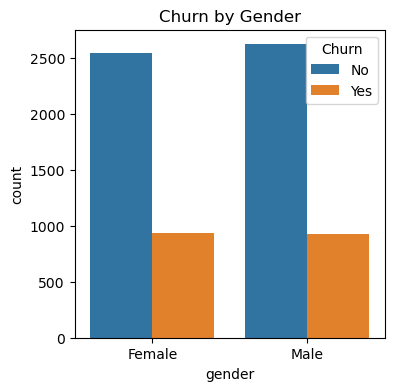

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title ("Churn by Gender")
plt.show()

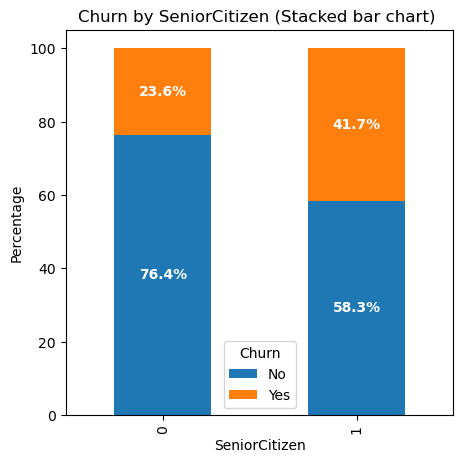

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data (Replace with df)
# df = pd.read_csv("your_data.csv")

# Calculate percentage
group_counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
group_percent = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
group_percent.plot(kind="bar", stacked=True, color=["#1f77b4", "#ff7f0e"], ax=ax)


# Add labels
for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-position
                bar.get_y() + height / 2,           # Y-position
                f"{height:.1f}%",                   # Label
                ha="center", va="center", color="white", fontsize=10, fontweight="bold"
            )

# Titles and labels
plt.title("Churn by SeniorCitizen (Stacked bar chart) ")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.show()


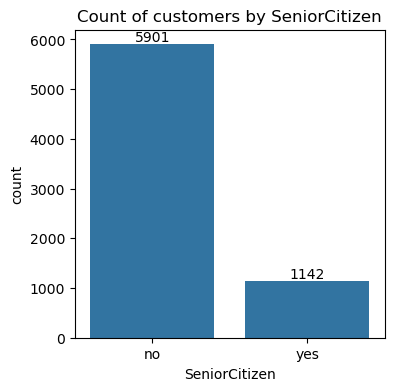

In [16]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title ("Count of customers by SeniorCitizen")
plt.show()

#comparetve a ggrated percentage of people in senior citizen category have churned.

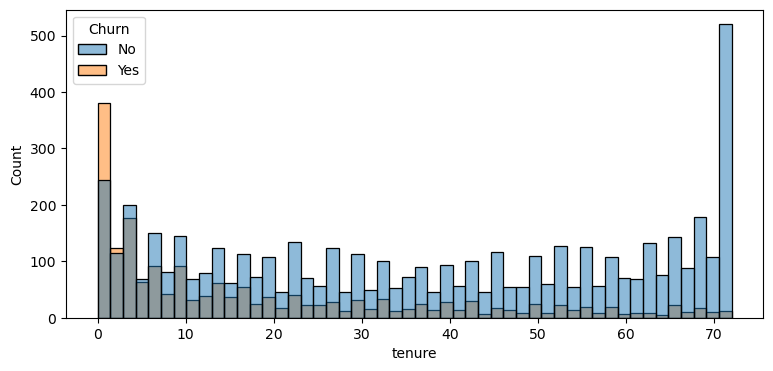

In [17]:
plt.figure(figsize =(9,4))
sns.histplot(x="tenure",data=df,bins= 50,hue="Churn")
plt.show()

#people wh have used  our services for a long time have stayed and people who have used our services #1  or 2 months have churned 

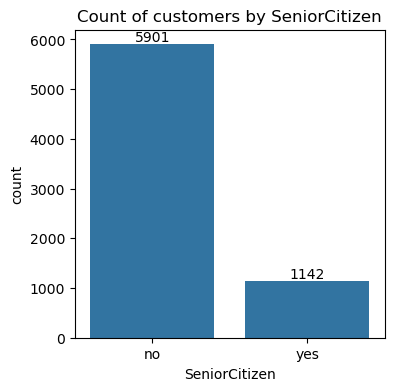

In [18]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title ("Count of customers by SeniorCitizen")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract

In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

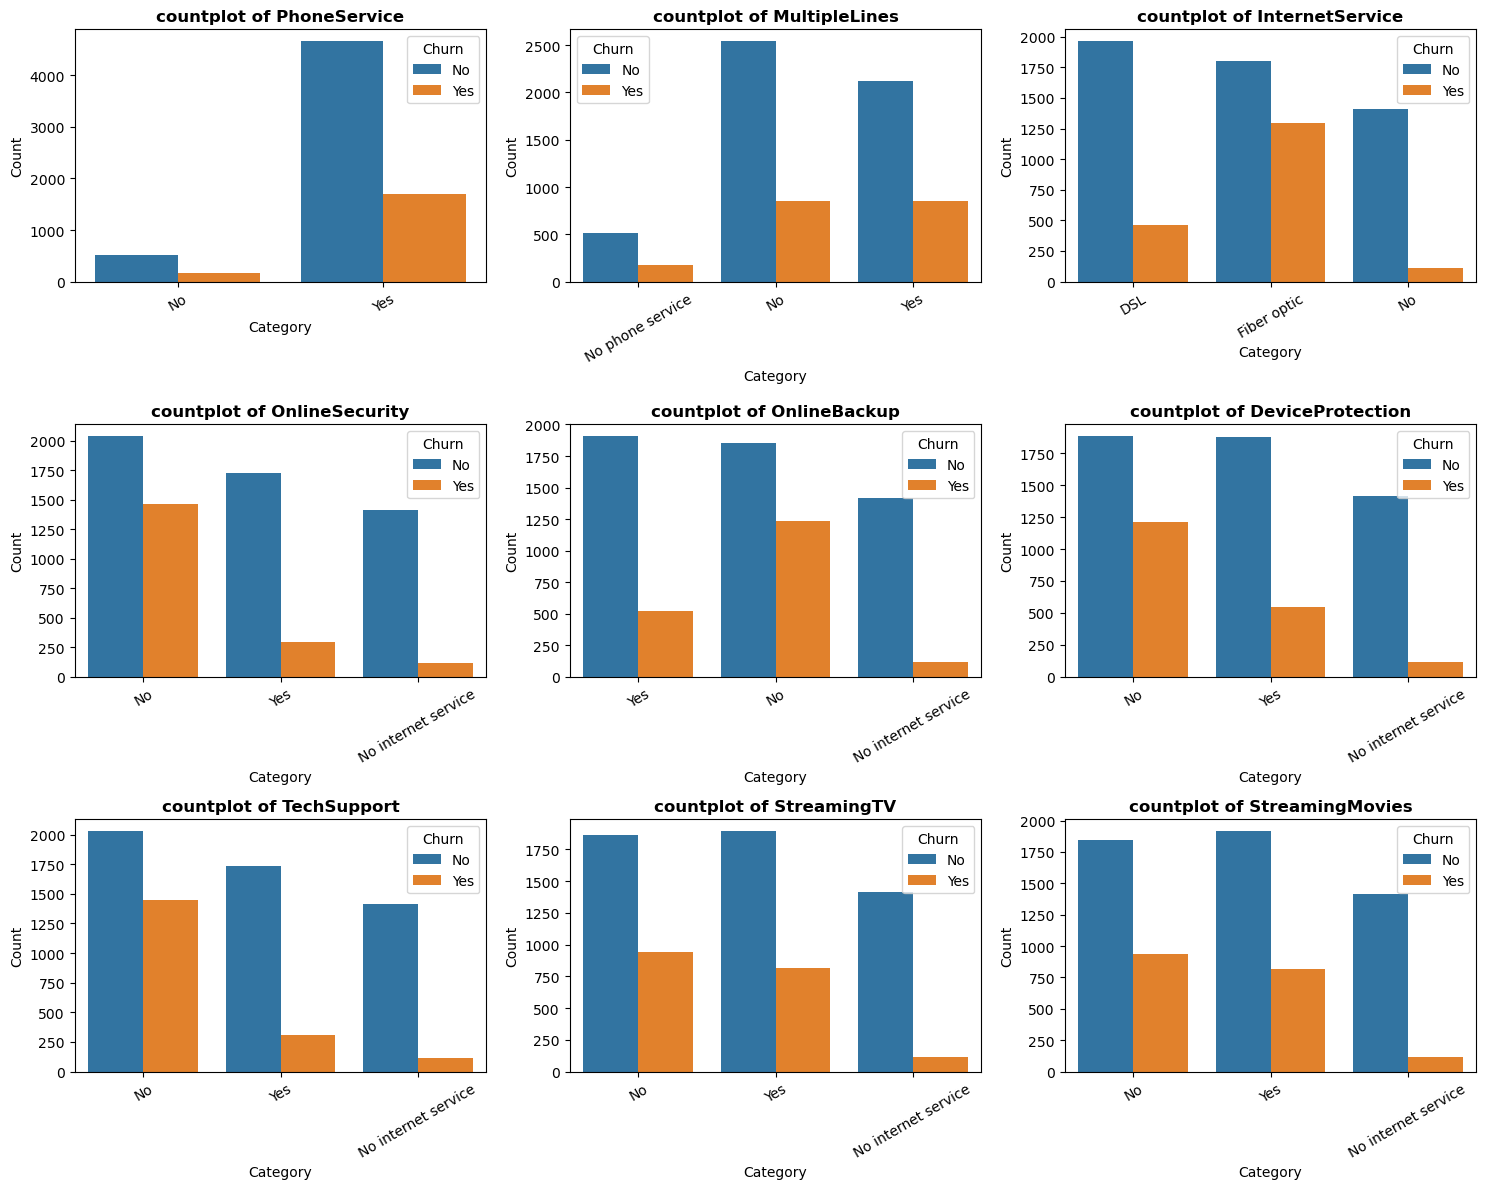

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (Replace this with your actual dataset)
data =pd.read_csv("customer churn.csv")

df = pd.DataFrame(data)

# Define columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Generate countplots for each column using countplot with hue
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])#palette='coolwarm'
    axes[i].set_title(f"countplot of {col}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Category', fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


#The majority of customers who do not churn trend to have services like phoneServices,internetServices particularly DSL1 and onlinesecurity enabled for services like online backup, TechSupport and streamingTv,churn rates are noticeably higher when  theses services are not used or are unavailable.

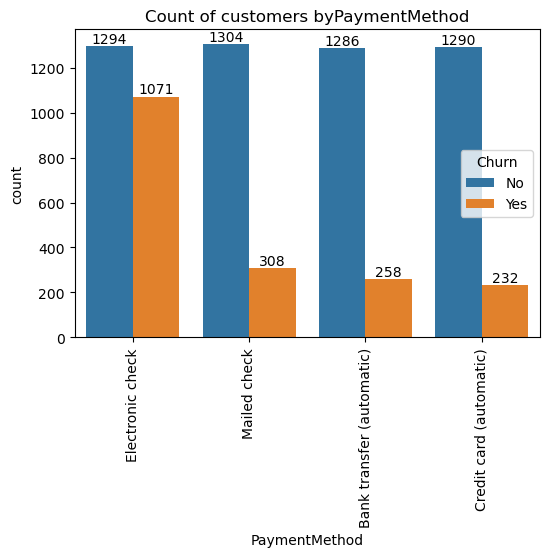

In [29]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title ("Count of customers byPaymentMethod")
plt.xticks(rotation =90)
plt.show()


#ustomer is likely to churn when he is useing electronic check as a payment method.